In [1]:
import torch, tqdm 
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

GPU State: cuda:0


In [3]:
# Transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)

In [4]:
# Data
trainSet = datasets.MNIST(root='MNIST', download=True, train=True, transform=transform)
testSet = datasets.MNIST(root='MNIST', download=True, train=False, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=64, shuffle=True)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=64, shuffle=False)

In [5]:
# Model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=10, kernel_size=2),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=10, out_channels=20, kernel_size=2),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=20, out_channels=100, kernel_size=2),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=100*625, out_features=10),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, input):
        return self.main(input)


net = Net().to(device)
print(net)

Net(
  (main): Sequential(
    (0): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 20, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(20, 100, kernel_size=(2, 2), stride=(1, 1))
    (5): ReLU()
    (6): Flatten()
    (7): Linear(in_features=62500, out_features=10, bias=True)
    (8): Softmax(dim=1)
  )
)


In [9]:
# Parameters
epochs = 400
lr = 0.002
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.002, momentum=0.9)

In [10]:
# Train
epoch_loss = []
epoch_acc = []
for epoch in range(epochs):
    running_loss = 0.0
    running_acc = 0.0
    for times, data in enumerate(trainLoader):
        inputs, labels = data[0].to(device), data[1].to(device)
#         inputs = inputs.view(inputs.shape[0], -1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Foward + backward + optimize
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        running_acc += (labels==predicted).sum().item()
#         if times % 100 == 99 or times+1 == len(trainLoader):
#             print('[%d/%d, %d/%d] loss: %.3f' % (epoch+1, epochs, times+1, len(trainLoader), running_loss/2000))
    _epoch_loss = running_loss/len(trainLoader)
    _epoch_acc = running_acc/len(trainLoader)
    epoch_loss.append(_epoch_loss)
    epoch_acc.append(_epoch_acc)
    print(epoch+1, _epoch_loss, _epoch_acc)
print('Training Finished.')

1 1.466963319000659 63.59701492537314
2 1.4669387925154111 63.60021321961621
3 1.4669114107262098 63.60021321961621
4 1.466905148044578 63.60021321961621
5 1.466918475846492 63.60021321961621
6 1.4668968610926223 63.60127931769723
7 1.4668898558311625 63.60127931769723
8 1.4668807410227973 63.60127931769723
9 1.4668850953390857 63.60127931769723
10 1.4668658277881679 63.60341151385928
11 1.4668408286596921 63.6044776119403
12 1.4668318218768024 63.6044776119403
13 1.4668319357483626 63.6044776119403
14 1.4668282987212322 63.6044776119403
15 1.466824460131273 63.6044776119403
16 1.4668247788699704 63.6044776119403
17 1.4668429745539928 63.60554371002132
18 1.4668259015723841 63.60554371002132
19 1.4668200539627563 63.60554371002132
20 1.4668022837720192 63.60554371002132
21 1.4667993503084569 63.60554371002132
22 1.4667979040379717 63.60554371002132
23 1.4668122646905213 63.60554371002132
24 1.4667945650340652 63.60554371002132
25 1.466792724915405 63.60554371002132
26 1.466792220118711

KeyboardInterrupt: 

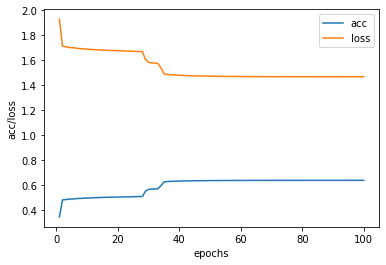

In [8]:
x = np.linspace(1, epochs, num = epochs)
plt.plot(x, np.array(epoch_acc)/100, label='acc')
plt.plot(x, epoch_loss, label='loss')
plt.xlabel('epochs')
plt.ylabel('acc/loss')
plt.legend(loc="upper right")
plt.show()

In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data in testLoader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct / total))

class_correct = [0 for i in range(10)]
class_total = [0 for i in range(10)]

with torch.no_grad():
    for data in testLoader:
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
#             print(class_correct)
#             print(class_total)

for i in range(10):
    print('Accuracy of %d: %3f' % (i, (class_correct[i]/class_total[i])))

Accuracy of the network on the 10000 test images: 92 %
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 1, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 2]
[1, 2, 1, 0, 2, 1, 0, 1, 0, 2]
[1, 2, 1, 0, 2, 0, 0, 2, 0, 2]
[1, 2, 1, 0, 2, 1, 0, 2, 0, 2]
[1, 2, 1, 0, 3, 0, 0, 2, 0, 2]
[1, 2, 1, 0, 3, 1, 0, 2, 0, 2]
[1, 2, 1, 0, 3, 0, 0, 2, 0, 2]
[1, 2, 1, 0, 3, 1, 1, 2, 0, 2]
[1, 2, 1, 0, 4, 0, 0, 2, 0, 2]
[1, 2, 1, 0, 4, 1, 1, 2, 0, 2]
[1, 2, 1, 1, 4, 0, 0, 2, 0, 2]
[1, 2, 1, 1, 4, 1, 1, 2, 0, 2]
[2, 2, 1, 1, 4,